Name: Ahmet Boran Özüm
Student Id: 2380814

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.signal
import time

In [4]:
chessboard = cv2.imread('chessboard.png')
agac = cv2.imread('agac.png')
chessboard_rotated = cv2.imread('chessboardrotated.png')
agac_rotated = cv2.imread('agacrotated.png')
lab_rotated = cv2.imread('labrotated.png')
lab = cv2.imread('lab.png')

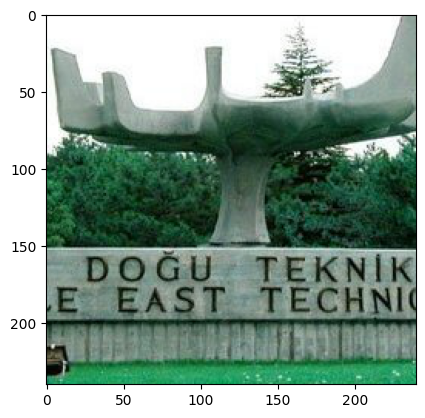

In [20]:
plt.imshow(agac)

### Task 1: Naive Formula + Uniform Weighting

In [21]:
def naive_uniform(original_img):
    img_copy = original_img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    window = np.ones((3,3))
    
    res = np.zeros(img_gray.shape)
#     for key, value in shift_kernels.items():
# #         shift = (img_gray - scipy.signal.convolve2d(img_gray, value, mode='same', boundary='symm'))**2
# #         res += scipy.signal.convolve2d(shift, window, mode='same', boundary='fill', fillvalue=0)

#         org = cv2.filter2D(src=img_gray, ddepth=-1, kernel=window)
#         shift = cv2.filter2D(src=img_gray, ddepth=-1, kernel=value)
#         shift = cv2.filter2D(src=shift, ddepth=-1, kernel=window)
        
#         dif = (org-shift)**2
        
#         res += dif

    for y in range(2,len(img_gray)-2):
        for x in range(2,len(img_gray[0])-2):
            
            total_sum = 0
            original_window = img_gray[y-1:y+2, x-1:x+2]
            for u in range(-1,2):
                for v in range(-1,2):
                    if u==0 and v==0:
                        continue
                    shifted_window = img_gray[y+u-1:y+u+2, x+v-1: x+v+2]
                    diff = original_window-shifted_window
                    diff_squared = np.square(diff)
                    total_sum += np.sum(diff_squared)
            
            res[y][x] = total_sum
            
                
    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y,x], 3, (255, 0, 0), -1)
    
    return img_copy

Time elapsed for chessboard 3.191629
Time elapsed for rotated chessboard 3.008646
Time elapsed for agac 2.999857
Time elapsed for rotated agac 2.958164
Time elapsed for lab 2.967864
Time elapsed for rotated lab 2.954775


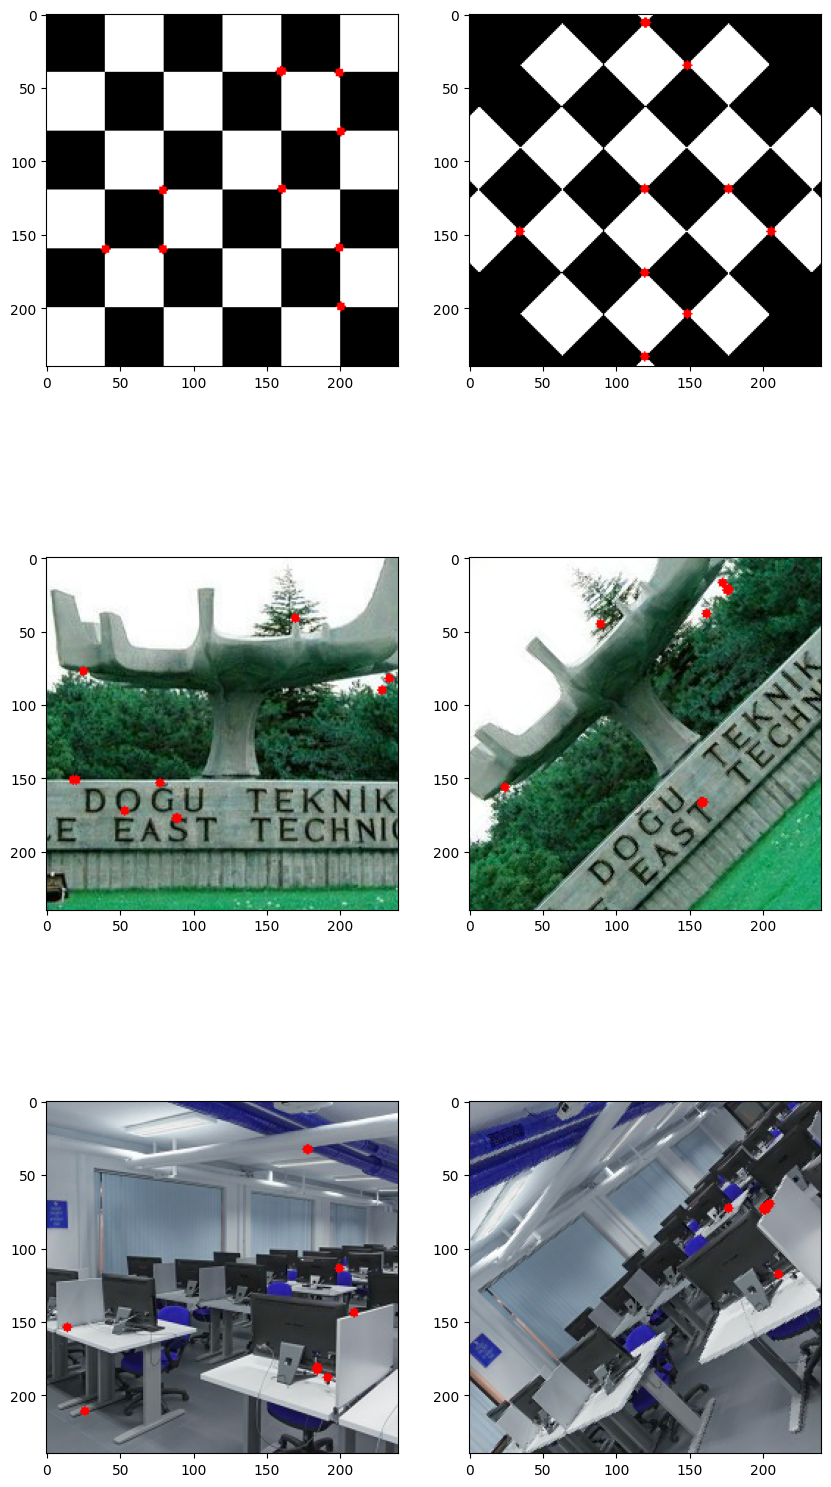

In [22]:
## Write your code here

fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(naive_uniform(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(naive_uniform(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(naive_uniform(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))


fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(naive_uniform(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))


fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(naive_uniform(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(naive_uniform(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))


In [ ]:
## This part is for discussion



### Task2: Naive Formula + Uniform Weighting + Non-Maximum Suppression

In [18]:
## Write your code here

def naive_uniform_nonmax(original_img):
    img_copy = original_img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    window = np.ones((3,3))
    
    res = np.zeros(img_gray.shape)
#     for key, value in shift_kernels.items():
# #         shift = (img_gray - scipy.signal.convolve2d(img_gray, value, mode='same', boundary='symm'))**2
# #         res += scipy.signal.convolve2d(shift, window, mode='same', boundary='fill', fillvalue=0)

#         org = cv2.filter2D(src=img_gray, ddepth=-1, kernel=window)
#         shift = cv2.filter2D(src=img_gray, ddepth=-1, kernel=value)
#         shift = cv2.filter2D(src=shift, ddepth=-1, kernel=window)
        
#         dif = (org-shift)**2
        
#         res += dif

    for y in range(2,len(img_gray)-2):
            for x in range(2,len(img_gray[0])-2):

                total_sum = 0
                original_window = img_gray[y-1:y+2, x-1:x+2]
                for u in range(-1,2):
                    for v in range(-1,2):
                        if u==0 and v==0:
                            continue
                        shifted_window = img_gray[y+u-1:y+u+2, x+v-1: x+v+2]
                        diff = original_window-shifted_window
                        diff_squared = np.square(diff)
                        total_sum += np.sum(diff_squared)

                res[y][x] = total_sum
    
    for y in range(10,len(res)-10):
        for x in range(10,len(res[0])-10):
            local_max = 0
            max_x = 0
            max_y = 0
            
            for u in range(-10,11):
                for v in range(-10,11):
                    if res[y+u][x+v] >= local_max:
                        local_max = res[y+u][x+v]
                        max_y = y+u
                        max_x = x+v
                    res[y+u][x+v] = 0
            
            res[max_y][max_x] = local_max
    plt.imshow(res)      
                    
    
    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y,x], 3, (255, 0, 0), -1)
    
    return img_copy


Time elapsed for chessboard 16.073621
Time elapsed for rotated chessboard 17.117548
Time elapsed for agac 16.464838
Time elapsed for rotated agac 16.882297
Time elapsed for lab 16.482593
Time elapsed for rotated lab 15.915204


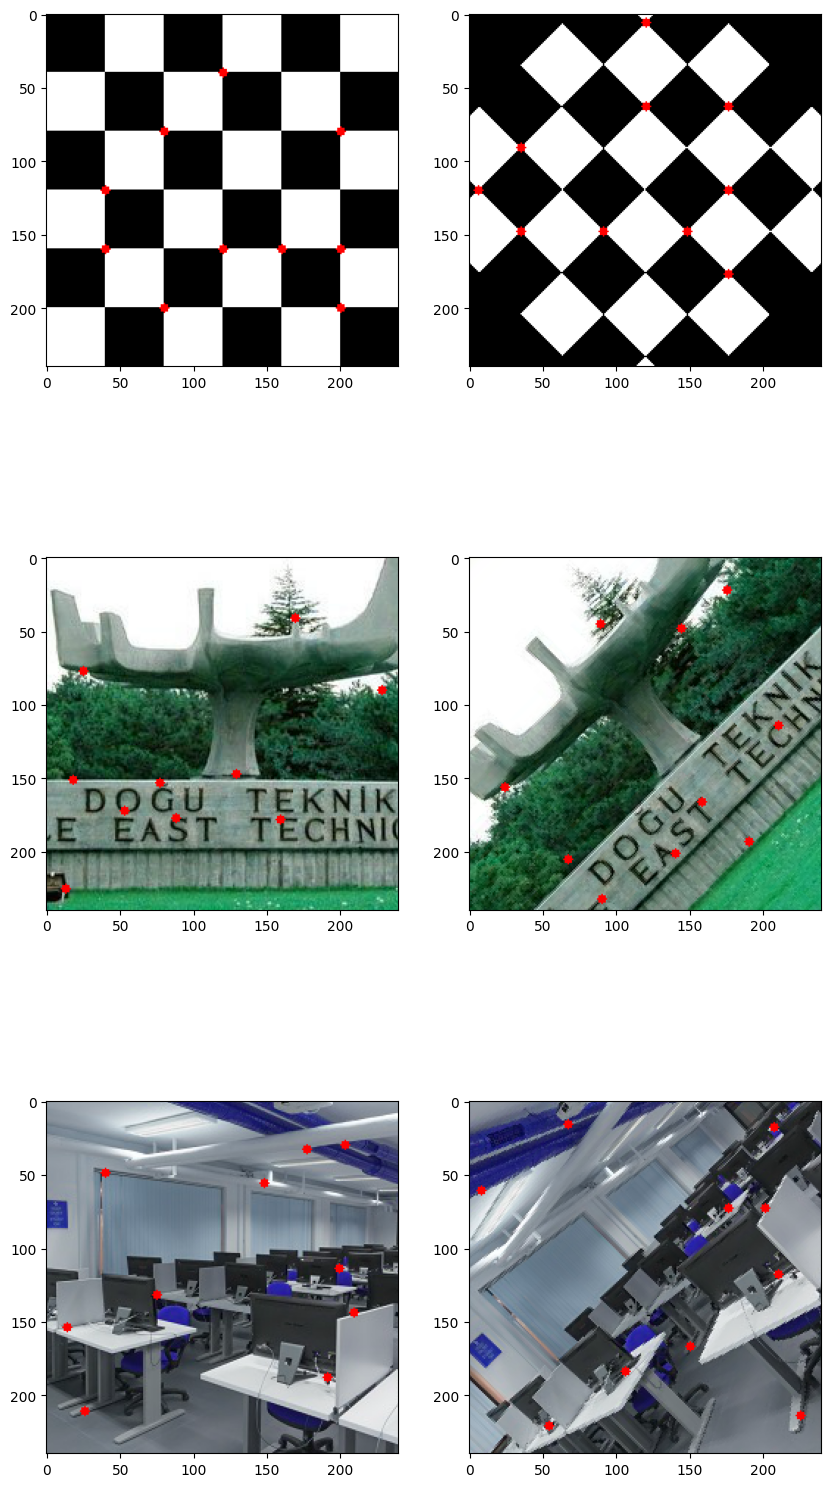

In [19]:
## Write your code here

fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(naive_uniform_nonmax(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(naive_uniform_nonmax(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(naive_uniform_nonmax(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))


fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(naive_uniform_nonmax(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))


fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(naive_uniform_nonmax(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(naive_uniform_nonmax(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))


In [ ]:
## This part is for discussion



### Task3: Taylor's Approximation + Uniform Weighting + Non-Maximum Suppression

In [11]:
## Write your code here

sobel_x = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobel_y = sobel_x.T

def taylor_uniform_nonmax(original_img):
    img_copy = original_img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    I_x = cv2.filter2D(src=img_gray, ddepth=-1, kernel=sobel_x)
    I_y = cv2.filter2D(src=img_gray, ddepth=-1, kernel=sobel_y)
    I_x_I_y = I_x*I_y
    I_x_squared = np.square(I_x)
    I_y_squared = np.square(I_y)
    
    res = np.zeros(img_gray.shape)
    for y in range(2,len(res)-2):
        for x in range(2,len(res[0])-2):
            total_sum = 0
            ix = I_x_squared[y-1:y+2, x-1:x+2]
            iy = I_y_squared[y-1:y+2, x-1:x+2]
            ixiy = I_x_I_y[y-1:y+2, x-1:x+2]
                
            for u in range(-1,2,2):
                for v in range(-1,2,2):
                    for wy in range(3):
                        for wx in range(3):
                            H = np.array([[ix[wy][wx], ixiy[wy][wx]], [ixiy[wy][wx], iy[wy][wx]]])
                            mul = np.matmul(np.array([u,v]), H)
                            mul = np.matmul(mul, np.array([[u],[v]]))
                            total_sum += mul[0]
            
            res[y][x] = total_sum
            
    for y in range(10,len(res)-10):
        for x in range(10,len(res[0])-10):
            local_max = 0
            max_x = 0
            max_y = 0
            
            for u in range(-10,11):
                for v in range(-10,11):
                    if res[y+u][x+v] >= local_max:
                        local_max = res[y+u][x+v]
                        max_y = y+u
                        max_x = x+v
                    res[y+u][x+v] = 0
            
            res[max_y][max_x] = local_max
    plt.imshow(res)  
            
    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y,x], 3, (255, 0, 0), -1)
    
    return img_copy

Time elapsed for chessboard 26.512670
Time elapsed for rotated chessboard 26.611792
Time elapsed for agac 26.604852
Time elapsed for rotated agac 26.007417
Time elapsed for lab 26.496099
Time elapsed for rotated lab 26.200029


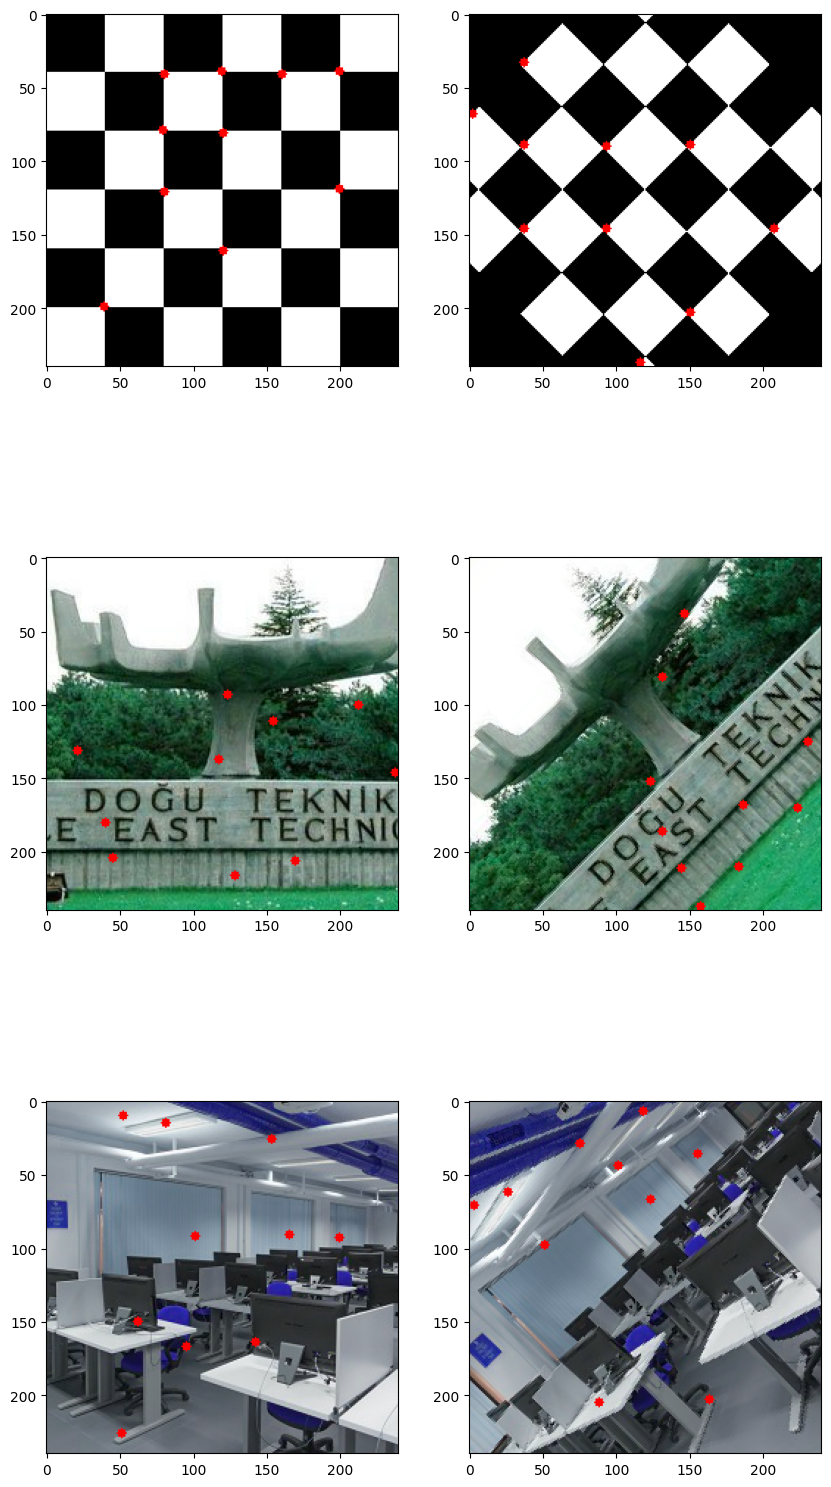

In [14]:
fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(taylor_uniform_nonmax(chessboard))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(taylor_uniform_nonmax(chessboard_rotated))
end = time.time()

print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(taylor_uniform_nonmax(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))

fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(taylor_uniform_nonmax(agac_rotated))
end = time.time()

print('Time elapsed for rotated agac %f' % (end-start))

fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(taylor_uniform_nonmax(lab))
end = time.time()

print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(taylor_uniform_nonmax(lab_rotated))
end = time.time()

print('Time elapsed for rotated lab %f' % (end-start))


In [ ]:
## This part is for discussion



### Task 4: Smaller Eigenvalue as corner score + Uniform Weighting + Non-Maximum Suppression

In [ ]:
## Write your code here


In [ ]:
## This part is for discussion



### Task 5: R function as corner score + Uniform Weighting + Non-Maximum Suppression

In [ ]:
## Write your code here


In [ ]:
## This part is for discussion



### Task 6: R function with fast windowing based on fitering + Uniform Weighting + Non-Maximum Suppression

In [ ]:
## Write your code here


In [ ]:
## This part is for discussion



### Task 7: R function with fast windowing based on fitering + Gaussian Weighting + Non-Maximum Suppression

In [ ]:
## Write your code here


In [ ]:
## This part is for discussion

